In [18]:
import tensorflow as tf
import numpy as np
import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# from wordcloud import WordCloud, STOPWORDS

import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords


# Load Data

In [19]:
(train_data, y_train), (test_data, y_test)=imdb.load_data(num_words=5000,seed=123)

# Fully Connected NN

In [20]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [21]:
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

## Create Neural Network

In [22]:
model = keras.Sequential(
    [
        layers.Dense(20, activation="relu", name="layer1", input_shape=(10000,)),
        layers.Dense(15, activation="relu", name="layer2"),
        layers.Dense(10, activation="relu", name="layer3"),
        layers.Dense(1,activation='sigmoid', name="output")
    ]
)

# Set optimizer and loss function
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 20)                200020    
                                                                 
 layer2 (Dense)              (None, 15)                315       
                                                                 
 layer3 (Dense)              (None, 10)                160       
                                                                 
 output (Dense)              (None, 1)                 11        
                                                                 
Total params: 200,506
Trainable params: 200,506
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs=10, batch_size=128)

Epoch 1/10
196/196 [==============================] - 5s 24ms/step - loss: 0.6927 - acc: 0.5197 - val_loss: 0.6917 - val_acc: 0.5577
Epoch 2/10
196/196 [==============================] - 3s 17ms/step - loss: 0.6884 - acc: 0.6031 - val_loss: 0.6819 - val_acc: 0.6544
Epoch 3/10
196/196 [==============================] - 3s 16ms/step - loss: 0.6620 - acc: 0.7149 - val_loss: 0.6347 - val_acc: 0.7575
Epoch 4/10
196/196 [==============================] - 3s 17ms/step - loss: 0.5862 - acc: 0.7880 - val_loss: 0.5324 - val_acc: 0.8057
Epoch 5/10
196/196 [==============================] - 3s 16ms/step - loss: 0.4684 - acc: 0.8233 - val_loss: 0.4218 - val_acc: 0.8318
Epoch 6/10
196/196 [==============================] - 3s 15ms/step - loss: 0.3790 - acc: 0.8499 - val_loss: 0.3665 - val_acc: 0.8493
Epoch 7/10
196/196 [==============================] - 3s 16ms/step - loss: 0.3316 - acc: 0.8658 - val_loss: 0.3337 - val_acc: 0.8620
Epoch 8/10
196/196 [==============================] - 3s 16ms/step - 

In [ ]:
results = model.evaluate(X_test, y_test)
print("_"*100)
print("Test Loss and Accuracy")
print("results ", results)

782/782 [==============================] - 2s 3ms/step - loss: 0.3018 - acc: 0.8752
____________________________________________________________________________________________________
Test Loss and Accuracy
results  [0.3018130362033844, 0.8752400279045105]


# Logistic Regression

In [ ]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
result=clf.score(X_test, y_test)
print("Accuracy:", result)

Accuracy: 0.85848


# CNN

In [ ]:
maxlen=130
X_train = pad_sequences(train_data, maxlen=maxlen)
X_test = pad_sequences(test_data, maxlen=maxlen)

In [ ]:
modelC = keras.Sequential(
    [
    layers.Embedding(5000,32,input_length=maxlen),
    layers.Conv1D(32,7, activation='relu'),
    layers.MaxPooling1D(4),
    layers.Flatten(),
    layers.Dense(8, activation='relu'),
    layers.Dense(1)
    ]
)
#X_train = np.asarray(X_train).astype('float32')
modelC.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
modelC.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 130, 32)           160000    
                                                                 
 conv1d_4 (Conv1D)           (None, 124, 32)           7200      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 31, 32)           0         
 1D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 992)               0         
                                                                 
 dense_8 (Dense)             (None, 8)                 7944      
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                      

In [ ]:
history = modelC.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=6, batch_size=128)

Epoch 1/6
196/196 [==============================] - 11s 51ms/step - loss: 0.6911 - accuracy: 0.6401 - val_loss: 0.5418 - val_accuracy: 0.7767
Epoch 2/6
196/196 [==============================] - 10s 50ms/step - loss: 0.4256 - accuracy: 0.8360 - val_loss: 0.5558 - val_accuracy: 0.8261
Epoch 3/6
196/196 [==============================] - 10s 50ms/step - loss: 0.3445 - accuracy: 0.8739 - val_loss: 0.4115 - val_accuracy: 0.8276
Epoch 4/6
196/196 [==============================] - 10s 51ms/step - loss: 0.2651 - accuracy: 0.9089 - val_loss: 0.4865 - val_accuracy: 0.8528
Epoch 5/6
196/196 [==============================] - 10s 50ms/step - loss: 0.1973 - accuracy: 0.9366 - val_loss: 0.5701 - val_accuracy: 0.8546
Epoch 6/6
196/196 [==============================] - 10s 50ms/step - loss: 0.1554 - accuracy: 0.9591 - val_loss: 0.7176 - val_accuracy: 0.8538


In [ ]:
results = modelC.evaluate(X_test, y_test)
print("_"*100)
print("Test Loss and Accuracy")
print("results ", results)

782/782 [==============================] - 4s 5ms/step - loss: 0.7176 - accuracy: 0.8538
____________________________________________________________________________________________________
Test Loss and Accuracy
results  [0.7175954580307007, 0.8537999987602234]


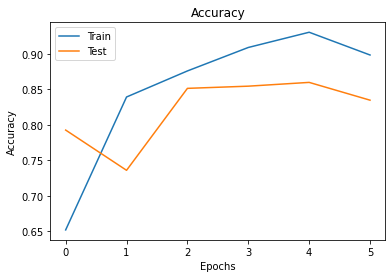

In [ ]:
plt.figure()
plt.plot(history.history["accuracy"],label="Train");
plt.plot(history.history["val_accuracy"],label="Test");
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show();

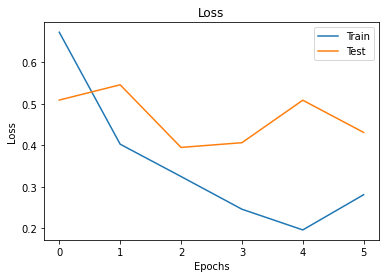

In [ ]:
plt.figure()
plt.plot(history.history["loss"],label="Train");
plt.plot(history.history["val_loss"],label="Test");
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show();

# Remove Stop Words

In [ ]:
nltk.download('stopwords')
sw_nltk = stopwords.words('english')
print(sw_nltk)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])

1654784/1641221 [==============================] - 0s 0us/step


## Remove from train

In [ ]:
filtered_train = []
for i in range(25000):
  filtered_sentence = []
  for k in train_data[i]:
    if reverse_word_index[k] not in sw_nltk:
      filtered_sentence.append(k)
  filtered_train.append(filtered_sentence)

## Remove from test

In [ ]:
filtered_test = []
for i in range(25000):
  filtered_sentence = []
  for k in test_data[i]:
    if reverse_word_index[k] not in sw_nltk:
      filtered_sentence.append(k)
  filtered_test.append(filtered_sentence)

# Fully Connected NN after Removal

In [ ]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [ ]:
X_train = vectorize_sequences(filtered_train)
X_test = vectorize_sequences(filtered_test)

## Create Neural Network

In [ ]:
model = keras.Sequential(
    [
        layers.Dense(20, activation="relu", name="layer1", input_shape=(10000,)),
        layers.Dense(15, activation="relu", name="layer2"),
        layers.Dense(10, activation="relu", name="layer3"),
        layers.Dense(1,activation='sigmoid', name="output")
    ]
)

# Set optimizer and loss function
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 20)                200020    
                                                                 
 layer2 (Dense)              (None, 15)                315       
                                                                 
 layer3 (Dense)              (None, 10)                160       
                                                                 
 output (Dense)              (None, 1)                 11        
                                                                 
Total params: 200,506
Trainable params: 200,506
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs=10, batch_size=128)

Epoch 1/10
196/196 [==============================] - 4s 18ms/step - loss: 0.6915 - acc: 0.5341 - val_loss: 0.6894 - val_acc: 0.5798
Epoch 2/10
196/196 [==============================] - 3s 15ms/step - loss: 0.6828 - acc: 0.6391 - val_loss: 0.6729 - val_acc: 0.6932
Epoch 3/10
196/196 [==============================] - 3s 17ms/step - loss: 0.6526 - acc: 0.7421 - val_loss: 0.6294 - val_acc: 0.7676
Epoch 4/10
196/196 [==============================] - 3s 16ms/step - loss: 0.5896 - acc: 0.7975 - val_loss: 0.5505 - val_acc: 0.8076
Epoch 5/10
196/196 [==============================] - 3s 15ms/step - loss: 0.4947 - acc: 0.8267 - val_loss: 0.4550 - val_acc: 0.8316
Epoch 6/10
196/196 [==============================] - 3s 14ms/step - loss: 0.4049 - acc: 0.8478 - val_loss: 0.3865 - val_acc: 0.8481
Epoch 7/10
196/196 [==============================] - 3s 14ms/step - loss: 0.3465 - acc: 0.8656 - val_loss: 0.3481 - val_acc: 0.8595
Epoch 8/10
196/196 [==============================] - 3s 14ms/step - 

In [ ]:
results = model.evaluate(X_test, y_test)
print("_"*100)
print("Test Loss and Accuracy")
print("results ", results)

782/782 [==============================] - 2s 3ms/step - loss: 0.3106 - acc: 0.8702
____________________________________________________________________________________________________
Test Loss and Accuracy
results  [0.3105619251728058, 0.8702399730682373]


# Logistic Regression after Removal

In [ ]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
result=clf.score(X_test, y_test)
print("Accuracy:", result)

Accuracy: 0.84856


# CNN after Removal

In [ ]:
maxlen=130
X_train = pad_sequences(filtered_train, maxlen=maxlen)
X_test = pad_sequences(filtered_test, maxlen=maxlen)

In [ ]:
modelC = keras.Sequential(
    [
    layers.Embedding(5000,32,input_length=maxlen),
    layers.Conv1D(32,7, activation='relu'),
    layers.MaxPooling1D(4),
    layers.Flatten(),
    layers.Dense(8, activation='relu'),
    layers.Dense(1)
    ]
)
#X_train = np.asarray(X_train).astype('float32')
modelC.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
modelC.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 130, 32)           160000    
                                                                 
 conv1d_1 (Conv1D)           (None, 124, 32)           7200      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 31, 32)           0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 992)               0         
                                                                 
 dense_2 (Dense)             (None, 8)                 7944      
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                      

In [ ]:
history = modelC.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=6, batch_size=128)

Epoch 1/6
196/196 [==============================] - 11s 51ms/step - loss: 0.5887 - accuracy: 0.7101 - val_loss: 0.4032 - val_accuracy: 0.8368
Epoch 2/6
196/196 [==============================] - 10s 50ms/step - loss: 0.3451 - accuracy: 0.8684 - val_loss: 0.3996 - val_accuracy: 0.8600
Epoch 3/6
196/196 [==============================] - 10s 51ms/step - loss: 0.2443 - accuracy: 0.9136 - val_loss: 0.4459 - val_accuracy: 0.8619
Epoch 4/6
196/196 [==============================] - 10s 50ms/step - loss: 0.1925 - accuracy: 0.9381 - val_loss: 0.4871 - val_accuracy: 0.8592
Epoch 5/6
196/196 [==============================] - 10s 50ms/step - loss: 0.1451 - accuracy: 0.9612 - val_loss: 0.5779 - val_accuracy: 0.8583
Epoch 6/6
196/196 [==============================] - 10s 50ms/step - loss: 0.1087 - accuracy: 0.9803 - val_loss: 0.6368 - val_accuracy: 0.8551


In [ ]:
results = modelC.evaluate(X_test, y_test)
print("_"*100)
print("Test Loss and Accuracy")
print("results ", results)

782/782 [==============================] - 3s 4ms/step - loss: 0.6368 - accuracy: 0.8551
____________________________________________________________________________________________________
Test Loss and Accuracy
results  [0.6367582678794861, 0.8550800085067749]


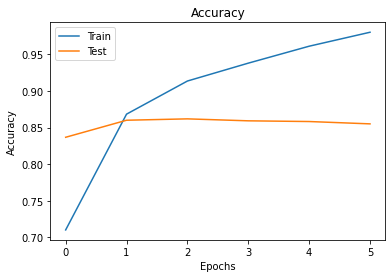

In [ ]:
plt.figure()
plt.plot(history.history["accuracy"],label="Train");
plt.plot(history.history["val_accuracy"],label="Test");
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show();

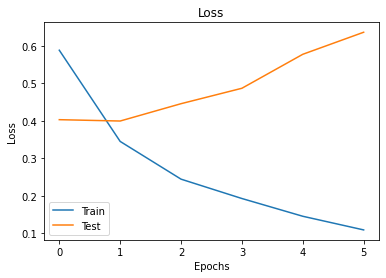

In [ ]:
plt.figure()
plt.plot(history.history["loss"],label="Train");
plt.plot(history.history["val_loss"],label="Test");
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show();